<a href="https://colab.research.google.com/github/audrb1999/Python_image/blob/main/git_hub8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***9.KNN 알고리즘***
> 간단한 머신러닝 알고리즘

###K - Nearest Neighbor
>k개의 가까운 이웃을 고르는 알고리즘

1. KNN(지도학습)의 가장 간단한 예시입니다.
2. 다양한 레이블의 데이터 중에서 자신과 가까운 데이터를 찾아 자신의 레이블을 정하는 방식입니다.

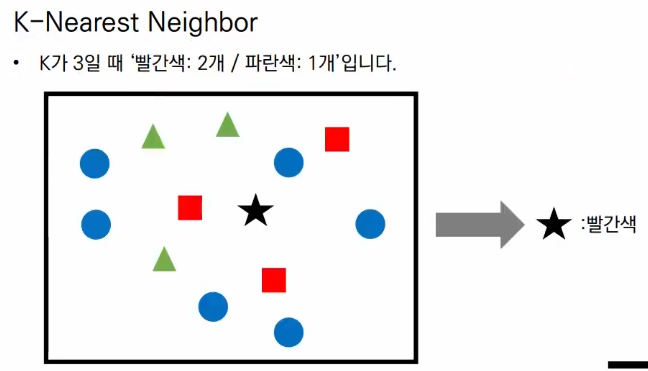

여러가지 데이터들이 이미 존재하는 상황에서 레이블이 3개 존재할 때 원, 사각형, 세모있다고 할 때 새로운 데이터가 들어오면 그 데이터가 어떤 라벨에 가까운지 찾아주는 것입니다.

k = 3이라고 설정했으면 주변에서 가장 가까운 3개의 값들을 고릅니다. 

현재는 빨간색 2개 파란색 1개가 새로운 데이터 주변에 있는 상태인데 빨간색의 비중이 더 큼으로 새로운 데이터는 빨간색 데이터로 분류 됩니다.

result :  [[0.]]
neighbours : [[0. 0. 0.]] 주변 라벨을 나타냅니다
distance:  [[125. 164. 232.]]


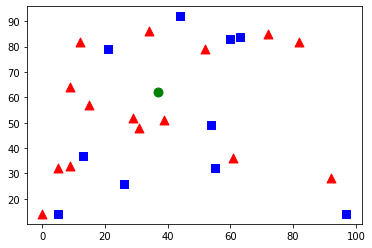

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 각 데이터의 위치: 25 X 2 크기에 각각 0 ~ 100
# 데이터 타입 중요! 총 25개(x, y)의 랜덤 데이터를 만들고 위치를 0~100사이로 잡은거
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 각 데이터는 0 or 1로 랜덤하게 둠 > 나눠준 것
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 값이 0인 데이터를 각각 (x, y) 위치에 빨간색으로 칠합니다.
red = trainData[response.ravel() == 0]
# x좌표(red[:, 0]) y좌표를 정해서 범위를 나눠 빨간색으로 칠한 것
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
# 값이 1인 데이터를 각각 (x, y) 위치에 파란색으로 칠합니다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)# 초록색 동그라미의 위치를 랜덤으로 주는 것!
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)#데이터의 위치, ? ,데이터 라벨를 받아 예측을 진행
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)#실제로 새로운 데이터 주변에서 가까운 3개의 데이터를 고르는 것

# 가까운 3개를 찾고, 거리를 고려하여 자신을 정합니다.
print("result : ", results)# 예측값
print("neighbours :", neighbours, '주변 라벨을 나타냅니다')
print("distance: ", dist)# 거리들을 알려줌

plt.show()